In [1]:
# This script is used to run the detection script in the BounceInsight module.
import sys
import os
current_dir = os.path.dirname(os.path.abspath('__file__'))
print(f'Current Directory: {current_dir}')
root_dir = os.path.abspath(os.path.join(current_dir, '..'))

if os.path.exists(root_dir):
    print(f'Root Directory exists: {root_dir}')
else:
    print(f'Root Directory does NOT exist: {root_dir}')
    

if root_dir not in sys.path:
    sys.path.append(root_dir)
    
try:
    from BounceInsight import BounceInsight
    print("Successfully imported BounceInsight")
except ModuleNotFoundError as e:
    print(f"BounceInsight module not found. Please check the module path. {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    
try:
    %reload_ext autoreload
except:
    %load_ext autoreload

%autoreload 2
    
csv_path = os.path.abspath(os.path.join(current_dir, 'files/loader'))
insight = BounceInsight(csv_path, "bounce")

Current Directory: C:\Users\timos\Desktop\BounceInsight
Root Directory exists: C:\Users\timos\Desktop
Successfully imported BounceInsight


In [5]:
insight.analyse_bounce(id=None, plot=False)

Finished 40_slownb3.csv: 100%|██████████| 778/778 [00:30<00:00, 25.55it/s]      


Number of bounce files in bounce_dict_70: 109
Number of bounce files in no_bounce_dict_70: 108
Number of bounce files in bounce_dict_80: 108
Number of bounce files in no_bounce_dict_80: 107
Number of bounce files in bounce_dict_slow: 87
Number of bounce files in no_bounce_dict_slow: 87
Number of bounce files in bounce_dict_fast: 87
Number of bounce files in no_bounce_dict_fast: 85


Results saved to validation/validation_results.csv
Visualized validation results saved to validation/validation_results.xlsx
Validation complete
Total points: 2328
Points within limits: 2264 (97.25%)
Points outside limits: 64 (2.75%)
The data is good (more than 95% points within limits of agreement).


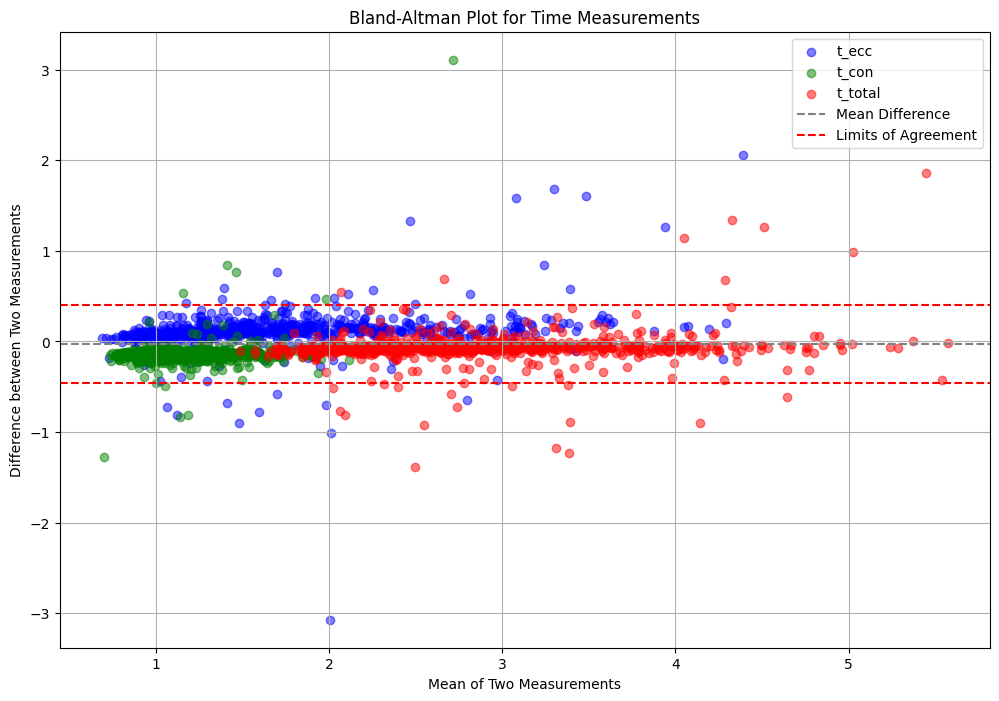

Total points: 776
Points within limits: 743 (95.75%)
Points outside limits: 33 (4.25%)
The data is good (more than 95% points within limits of agreement).


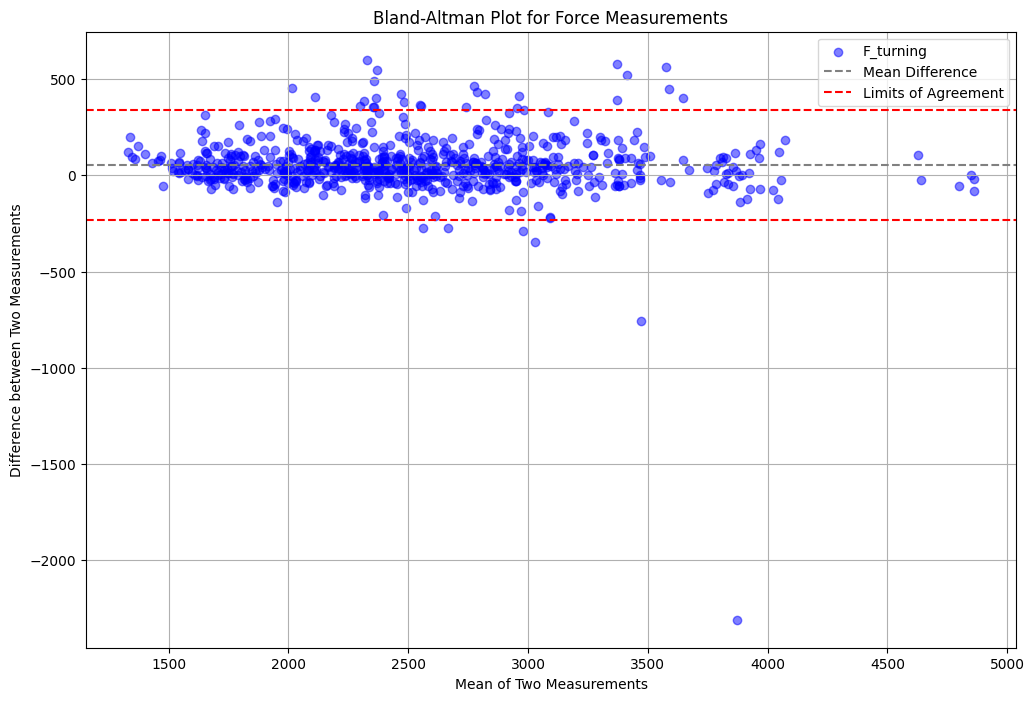

Total points: 776
Points within limits: 736 (94.85%)
Points outside limits: 40 (5.15%)
The data is not good (less than 95% points within limits of agreement).


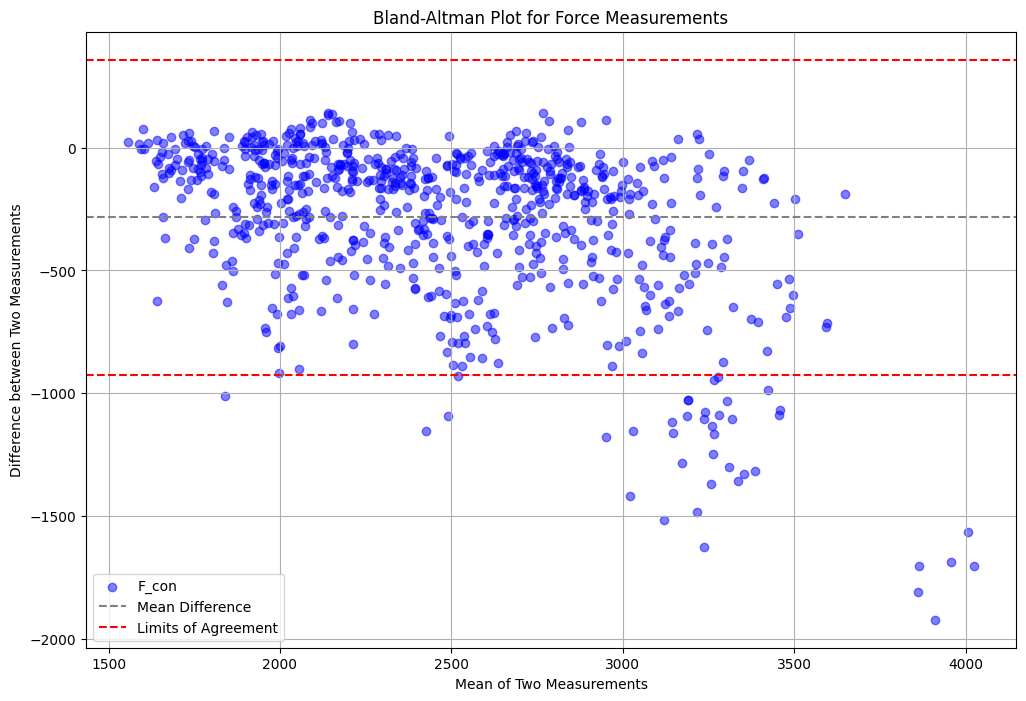

Correlation for t_ecc: 0.95, p-value < 0.001
Correlation for t_con: 0.84, p-value < 0.001
Correlation for t_total: 0.97, p-value < 0.001
Correlation for F_turning: 0.97, p-value < 0.001
Correlation for F_con: 0.83, p-value < 0.001


In [6]:
insight.validate(tolerance=0.05)

In [5]:
insight.run_statistics(analysis_type='summary', bounce_type='all')

Statistics for None:
t_ecc; Avg: 1.710, Std Dev: 0.718, Median: 1.546, Min: 0.149,Max: 5.422
t_con; Avg: 1.101, Std Dev: 0.283, Median: 1.043, Min: 0.069,Max: 4.268
t_total; Avg: 2.811, Std Dev: 0.787, Median: 2.663, Min: 0.937,Max: 6.377
F_turning; Avg: 2546.811, Std Dev: 615.555, Median: 2489.548, Min: 1393.323,Max: 4851.622
F_con; Avg: 2334.991, Std Dev: 437.692, Median: 2298.662, Min: 1329.104,Max: 3553.341


Dip detected: False


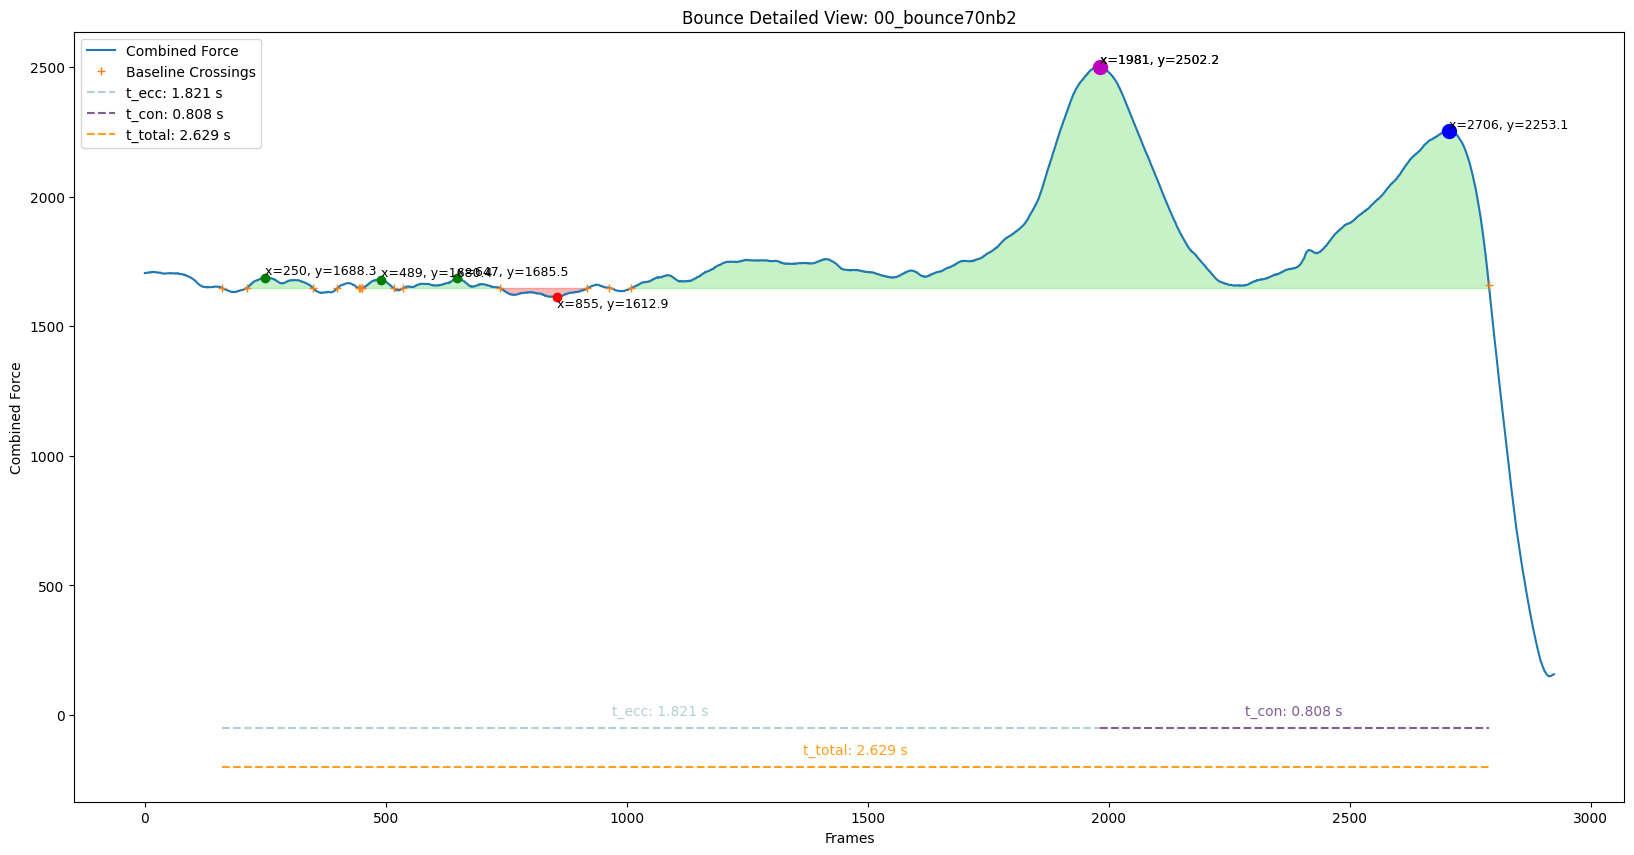

{'fps': 1000, 'source': 'fp', 'device': 'fp3d', 'gender': 'm', 'load': 90.0, 'bodyweight': 78.0}


In [7]:
insight.plot_data(file_name='00_bounce70nb2')

----------------------------------------------------
Levene's test for homogeneity of variances: W=0.418, p-value=0.518
ANOVA results for t_con_force comparing bounce and nobounce:
                sum_sq     df         F   PR(>F)
C(group)  4.652379e+05    1.0  2.243801  0.13488
Residual  8.977982e+07  433.0       NaN      NaN


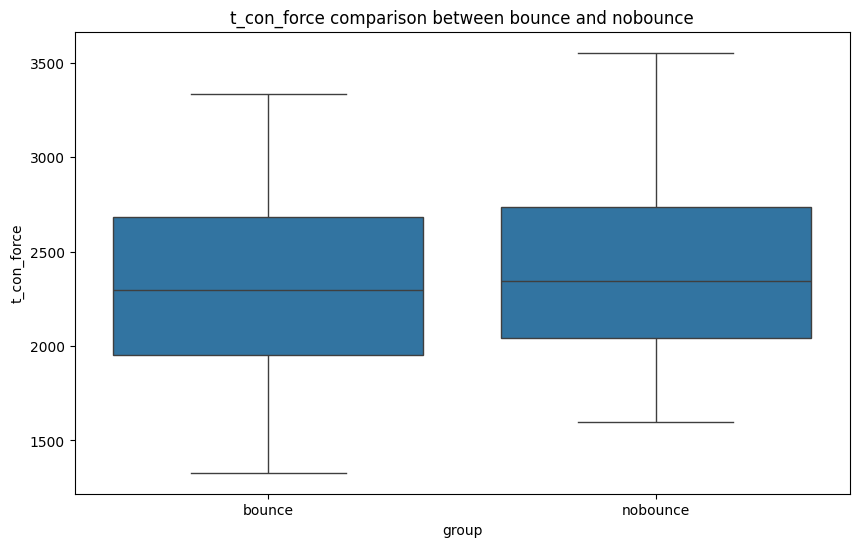

----------------------------------------------------
Levene's test for homogeneity of variances: W=0.002, p-value=0.966
ANOVA results for t_con_force comparing bounce and nobounce:
                sum_sq     df         F    PR(>F)
C(group)  2.754048e+05    1.0  1.635518  0.201794
Residual  5.859972e+07  348.0       NaN       NaN


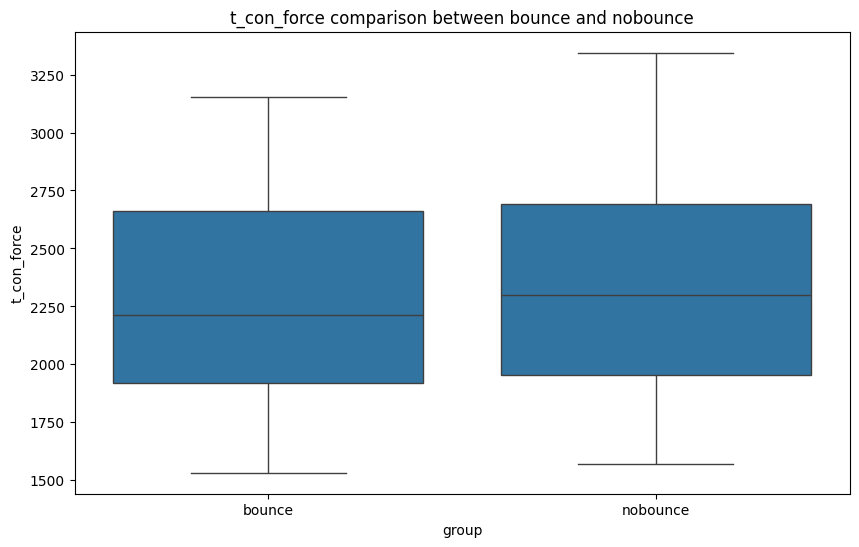

----------------------------------------------------
Levene's test for homogeneity of variances: W=0.270, p-value=0.603
ANOVA results for t_con_force comparing bounce and nobounce:
                sum_sq     df         F    PR(>F)
C(group)  7.402846e+05    1.0  3.880736  0.049195
Residual  1.493641e+08  783.0       NaN       NaN


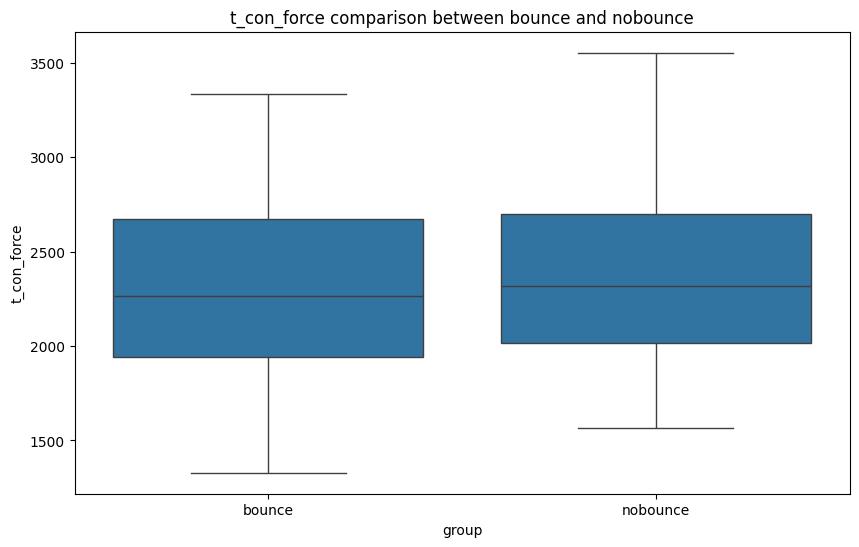

In [14]:
insight.run_statistics(analysis_type='anova', comparison_type='b_nb_weight', metric='t_con_force')
insight.run_statistics(analysis_type='anova', comparison_type='b_nb_speed', metric='t_con_force')
insight.run_statistics(analysis_type='anova', comparison_type='b_nb_all', metric='t_con_force')

Starting ANOVA calculation...
Metric: turning_force
Comparison Type: weightnb
ANOVA results for turning_force comparing bounce70nb and bounce80nb:
                sum_sq     df         F    PR(>F)
C(group)  6.585026e+05    1.0  2.266621  0.133662
Residual  6.217164e+07  214.0       NaN       NaN


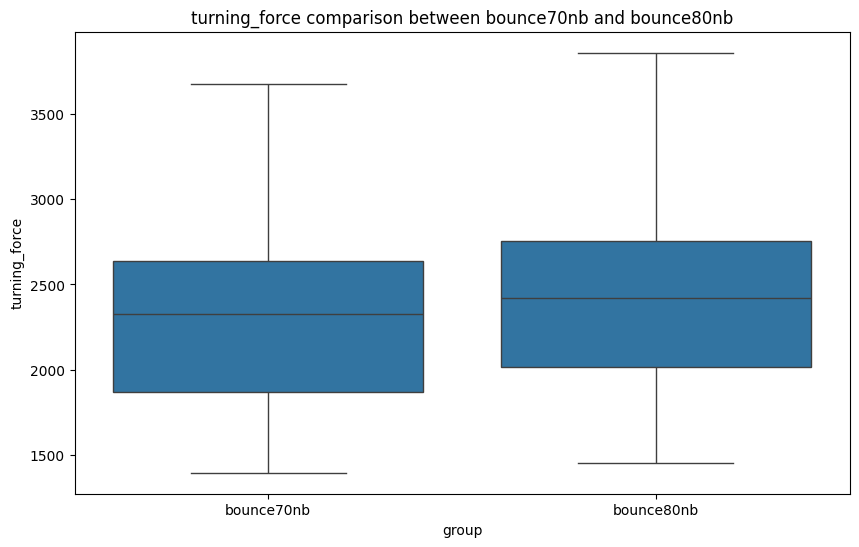

In [20]:
insight.run_statistics(analysis_type='anova', metric='turning_force', comparison_type='weightnb')

Contingency Table:
has_dip   False  True 
group                 
bounce      103    114
nobounce    190     25
Chi-Square Test:
Chi2: 80.94702675139126, p-value: 2.318501193247914e-19, Degrees of Freedom: 1


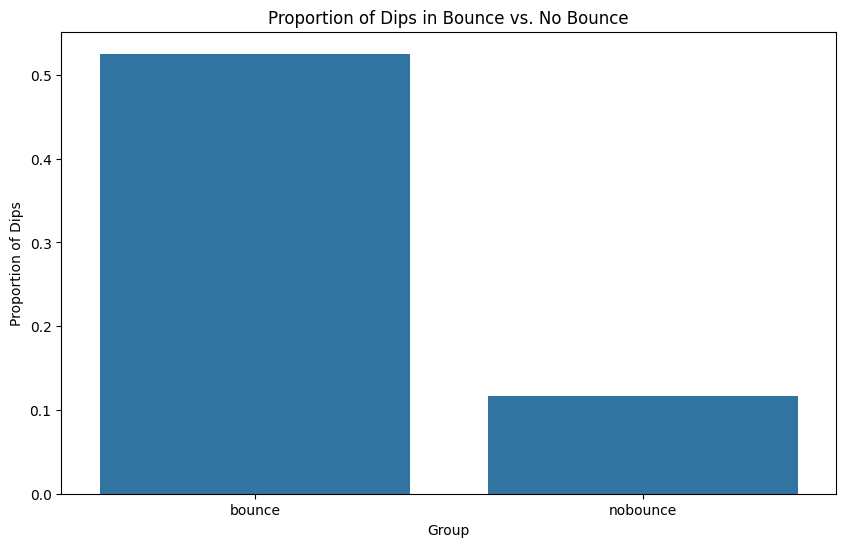

Contingency Table:
has_dip   False  True 
group                 
bounce       40    134
nobounce    147     25
Chi-Square Test:
Chi2: 133.43694981971464, p-value: 7.255054368918687e-31, Degrees of Freedom: 1


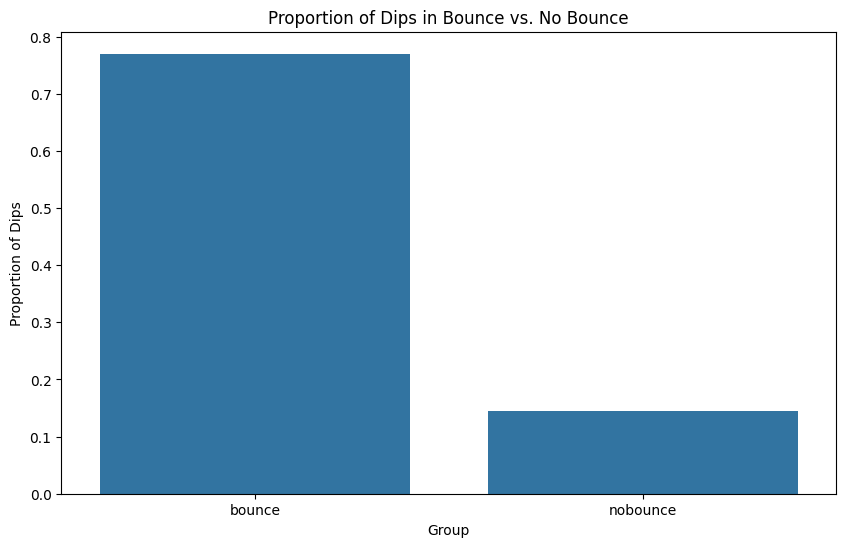

Contingency Table:
has_dip   False  True 
group                 
bounce      143    248
nobounce    337     50
Chi-Square Test:
Chi2: 207.81855485394908, p-value: 4.10966934872101e-47, Degrees of Freedom: 1


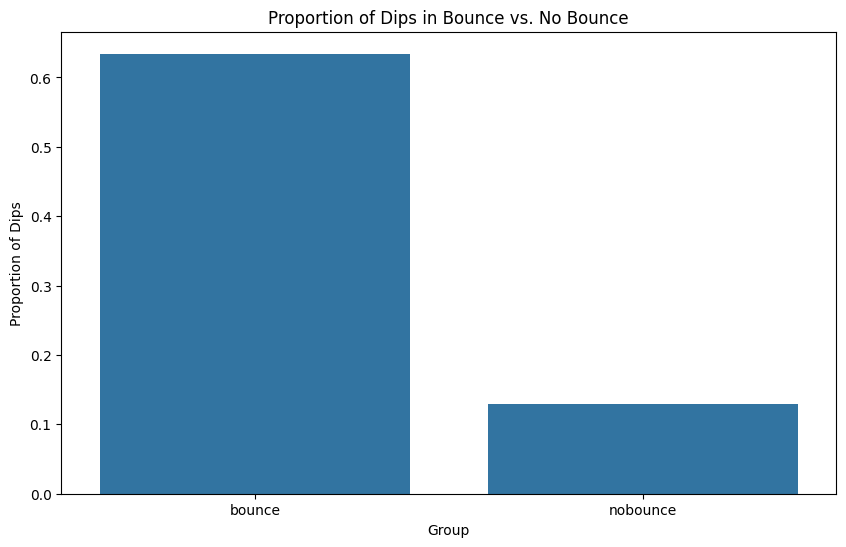

In [7]:
insight.run_statistics(analysis_type='chi2', comparison_type='b_nb_weight')
insight.run_statistics(analysis_type='chi2', comparison_type='b_nb_speed')
insight.run_statistics(analysis_type='chi2', comparison_type='b_nb_all')

Contingency Table:
has_dip     False  True 
group                   
bounce70b      53     58
bounce70nb     94     14
Chi-Square Test:
Chi2: 36.53066847672502, p-value: 1.502830269618108e-09, Degrees of Freedom: 1


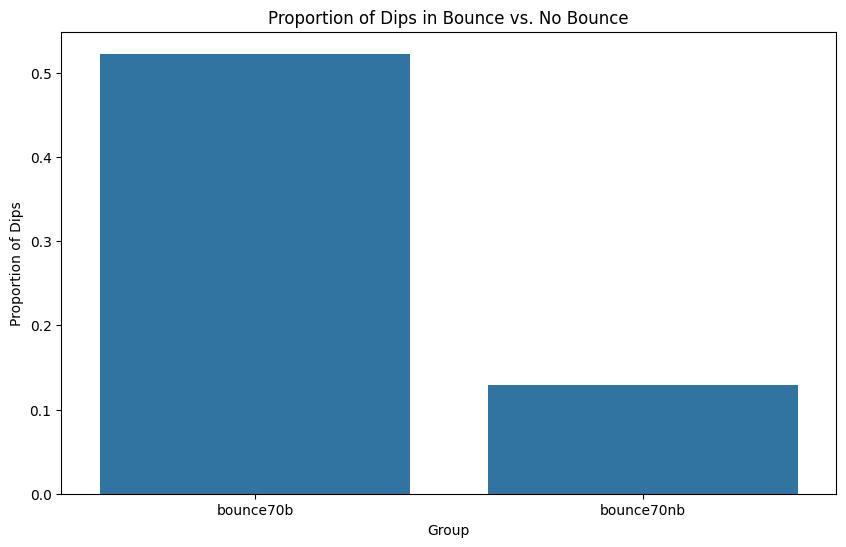

In [4]:
insight.run_statistics(analysis_type='chi2', comparison_type='b_nb_70')

Contingency Table:
has_dip     False  True 
group                   
bounce80b      52     56
bounce80nb     97     11
Chi-Square Test:
Chi2: 41.88881097866373, p-value: 9.661391549322764e-11, Degrees of Freedom: 1


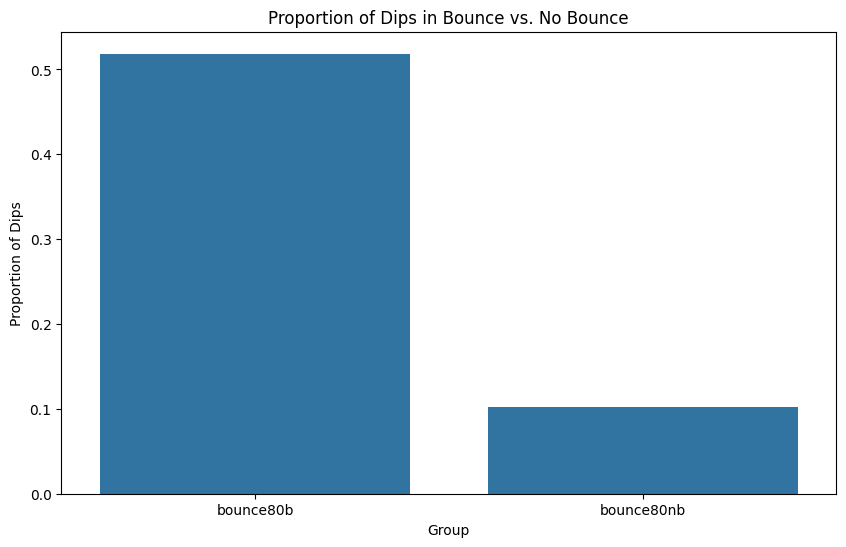

In [5]:
insight.run_statistics(analysis_type='chi2', comparison_type='b_nb_80')

Missing 'has_dip' for file_id: 10_fastnb3.csv
Missing 'has_dip' for file_id: 38_fastnb1.csv
Contingency Table:
has_dip  False  True 
group                
fastb       33     55
fastnb      76     10
Chi-Square Test:
Chi2: 45.95118408900679, p-value: 1.2123662625321589e-11, Degrees of Freedom: 1


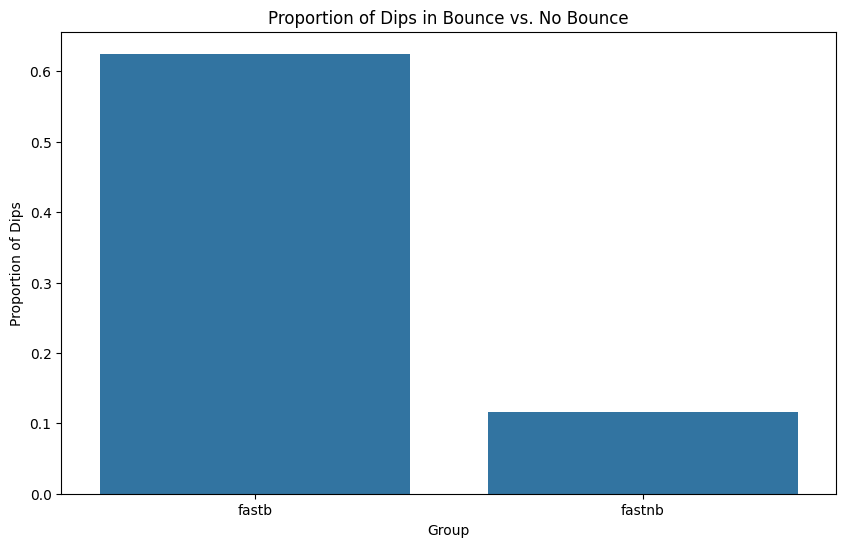

In [6]:
insight.run_statistics(analysis_type='chi2', comparison_type='b_nb_fast')

Contingency Table:
has_dip  False  True 
group                
slowb        9     80
slownb      72     15
Chi-Square Test:
Chi2: 90.56154673902363, p-value: 1.793115451963318e-21, Degrees of Freedom: 1


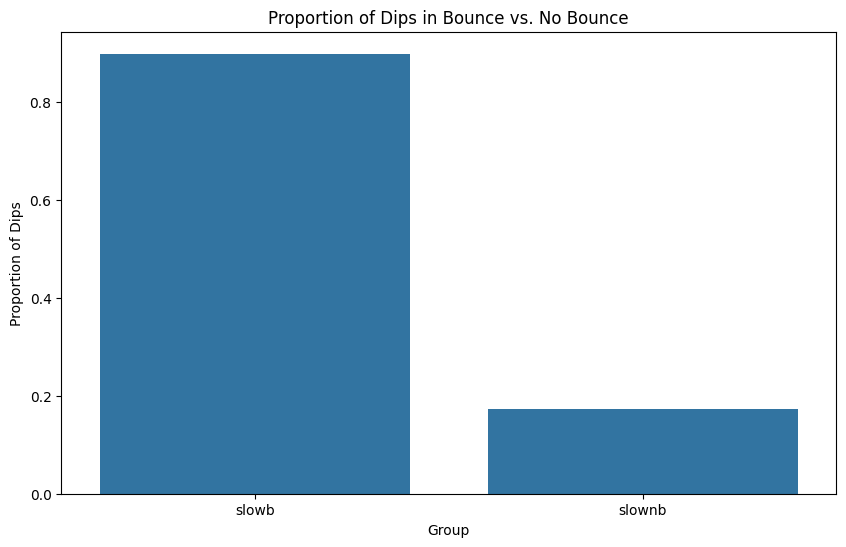

In [7]:
insight.run_statistics(analysis_type='chi2', comparison_type='b_nb_slow')